<a href="https://colab.research.google.com/github/ilyanovak/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [0]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
geo_country_codes.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


Check for missing/null values in the three dataframes

In [0]:
# Your Work Here

print(cell_phones.isnull().any())

geo                  False
time                 False
cell_phones_total    False
dtype: bool


In [0]:
print(population.isnull().any())

geo                 False
time                False
population_total    False
dtype: bool


In [0]:
print(geo_country_codes.isnull().any())

geo        False
country    False
dtype: bool


Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

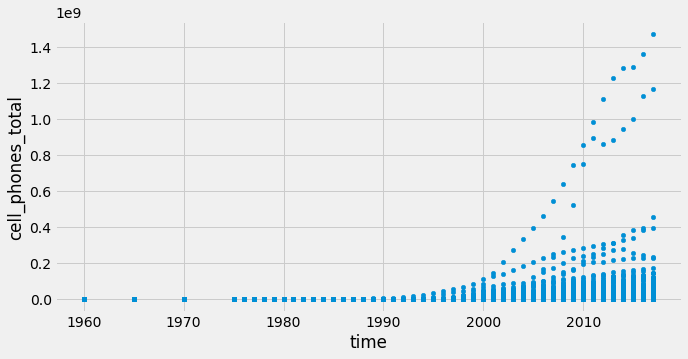

In [0]:
# Your Work Here

cell_phones.plot(kind='scatter', x='time', y='cell_phones_total', figsize=(10,5));

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
# Your Work Here

cell_pop = pd.merge(cell_phones, population, on=['geo','time'], how='inner')
print(cell_pop.shape)
cell_pop.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
# Your Work Here

cell_pop_codes = pd.merge(cell_pop, geo_country_codes, on='geo', how='inner')
print(cell_pop_codes.shape)
cell_pop_codes.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
# Your Work Here 

cell_pop_codes['cell_per_capita'] = cell_pop_codes['cell_phones_total'].divide(cell_pop_codes['population_total'])
print(cell_pop_codes.shape)
cell_pop_codes.head()

(8590, 6)


,geo,time,cell_phones_total,population_total,country,cell_per_capita
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [0]:
condition = (cell_pop_codes['geo'] == 'usa') & (cell_pop_codes['time'] == 2017)
cell_pop_codes[condition]['cell_per_capita']

8134    1.220125
Name: cell_per_capita, dtype: float64

### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
# Your Work Here

import numpy as np

In [0]:
cell_pop_codes.describe(include=[np.number])

,time,cell_phones_total,population_total,cell_per_capita
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [0]:
cell_pop_codes.describe(include=[np.object])

,geo,country
count,8590,8590
unique,195,195
top,swe,Iran
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
# Your Work Here

condition = cell_pop_codes['time'] == 2017
cell_total_2017 = cell_pop_codes[condition]
cell_total_2017 = cell_total_2017[['country','cell_phones_total']]
cell_total_2017 = cell_total_2017.sort_values(by='cell_phones_total', ascending=False)
cell_total_2017.head(5)

# Note: I can't figure out how to remove the scientific notation

,country,cell_phones_total
1496,China,1.474097e+09
3595,India,1.168902e+09
3549,Indonesia,4.589232e+08
8134,United States,3.958810e+08
1084,Brazil,2.364885e+08


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


### Part 1 — Recreate this explanatory visualization:



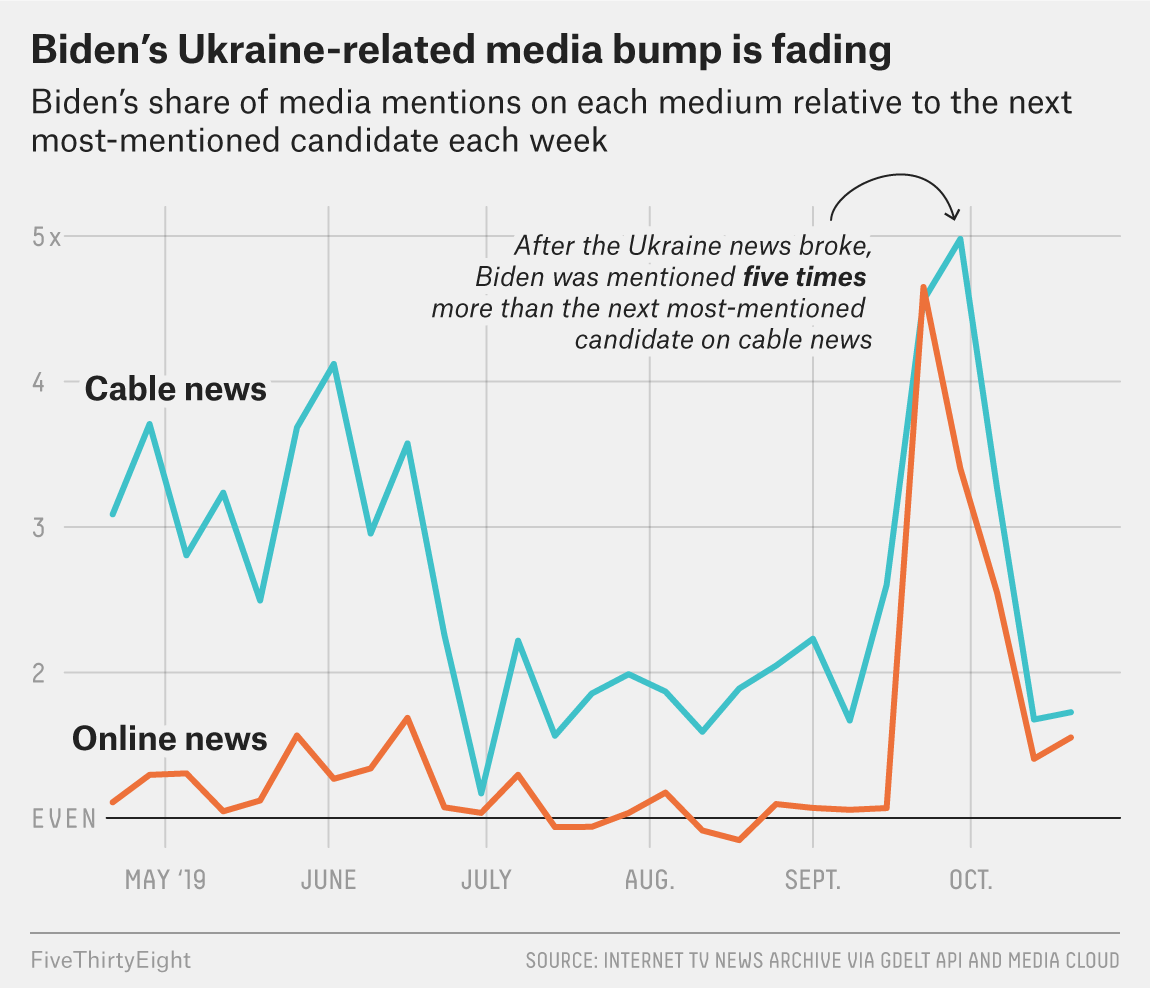

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

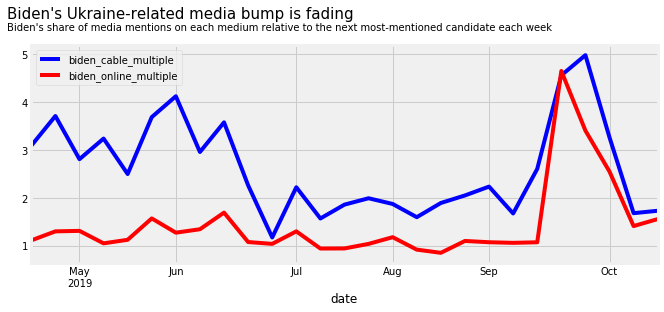

In [0]:
#Your Work Here

data_for_graph['biden_cable_multiple'].plot(kind='line', 
                                            figsize=(10,4), 
                                            color='blue', 
                                            legend=True)

data_for_graph['biden_online_multiple'].plot(kind='line', 
                                             figsize=(10,4), 
                                             color='red',
                                             legend=True)

title= "Biden's Ukraine-related media bump is fading"
subtitle = "Biden's share of media mentions on each medium relative to the next most-mentioned candidate each week"
plt.text(s=title, fontsize=15, x=2572, y=5.75);
plt.text(s=subtitle, x=2572, y=5.50);

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.


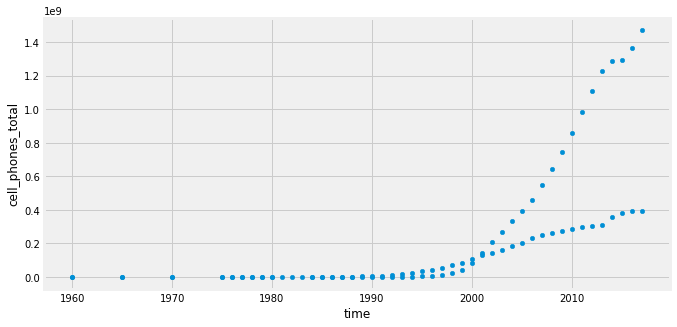

In [0]:
# Data Wrangling Section 1
# Filter the cell_phones dataframe to only include information about the USA 
# and China and then remake the scatterplot.

condition = (cell_phones['geo'] == 'usa') | (cell_phones['geo'] == 'chn')
usa_china = cell_phones[condition]
usa_china
usa_china.plot(kind='scatter', x='time', y='cell_phones_total', figsize=(10,5));

In [0]:
# Data Wrangling Section 2
# Explain why we are using an "inner" join when we merge these dataframes.

# Answer: When merging data frames, setting the parameter how='inner' drops 
# any rows in which on=key value is NaN because 90% of the time the resulting
# merged row is not useful, as it does not contain merged data from both
# data frames.

In [0]:
# Data Wrangling Section 3
# Modify the geo column to make the geo codes uppercase instead of lowercase.

In [0]:
geo_country_codes['geo'] = geo_country_codes['geo'].str.upper()
geo_country_codes

,geo,country
0,ABKH,Abkhazia
1,ABW,Aruba
2,AFG,Afghanistan
3,AGO,Angola
4,AIA,Anguilla
...,...,...
268,YEM_SOUTH,South Yemen (former)
269,YUG,Yugoslavia
270,ZAF,South Africa
271,ZMB,Zambia


In [0]:
# Data Wrangling Section 4
# 2017 was the first year that China had more cell phones than people.
# What was the first year that the USA had more cell phones than people?

condition = (cell_pop['geo'] == 'usa') & (cell_pop['cell_phones_total'] > cell_pop['population_total'])
cell_pop[condition].sort_values(by='time')

,geo,time,cell_phones_total,population_total
8131,usa,2014,355500000.0,317718779
8132,usa,2015,382307000.0,319929162
8133,usa,2016,395881000.0,322179605
8134,usa,2017,395881000.0,324459463


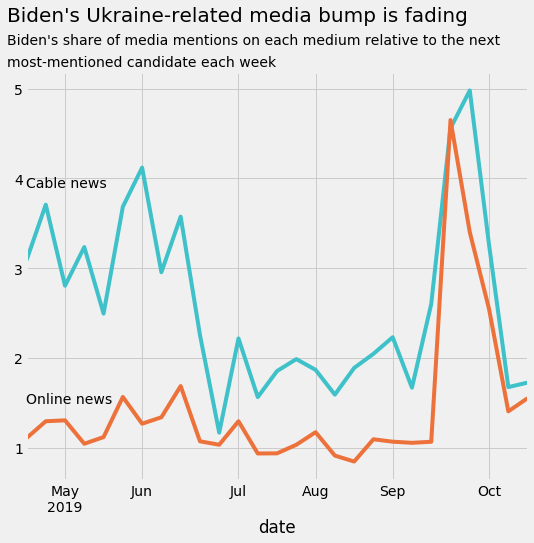

In [0]:
# Data Storytelling
# Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc.
# If you have already completed everything else, take this as far as you can within the time limit.

#Your Work Here

plt.style.use('fivethirtyeight')

plt.text(s="Biden's Ukraine-related media bump is fading", 
         fontsize=20, 
         x=2572, 
         y=5.75);
plt.text(s="Biden's share of media mentions on each medium relative to the next", 
         x=2572, 
         y=5.50)
plt.text(s="most-mentioned candidate each week", 
         x=2572, 
         y=5.25)

data_for_graph['biden_cable_multiple'].plot(kind='line', 
                                            figsize=(8,7), 
                                            color='#3FC1C9')

data_for_graph['biden_online_multiple'].plot(kind='line', 
                                             figsize=(8,7), 
                                             color='#ED713A')
plt.text(s="Cable news", x=2573, y=3.9);
plt.text(s="Online news", x=2573, y=1.5);